# 다음 기사 댓글 크롤링(Daum comments scraping)
> 특정 검색어에 대한 다음 플랫폼의 댓글 기사를 텍스트로 저장하고, 워드 클라우드로 시각화한다.

## 1. 라이브러리 불러오기

In [7]:
import requests 
from bs4 import BeautifulSoup 
import pandas as pd
from datetime import datetime
import time
import re

## 2. 검색어 설정

In [8]:
query = '백신'
url = 'https://search.daum.net/search?w=news&q='+query 

urls_list = [] #기사 url 담을 list

## 3. 검색 결과 가져올 기사 페이지 수 설정

In [9]:
for i in range(1): 
    print (i)
    url=url+"&p="+str(i)

    web = requests.get(url).content
    source = BeautifulSoup(web, 'html.parser')

    for urls in source.find_all('a', {'class' : "f_nb"}):
        urls_list.append(urls["href"])

print(urls_list)
# urls_list[0]

0
['http://v.media.daum.net/v/20210323191800153', 'http://v.media.daum.net/v/20210323165927514', 'http://v.media.daum.net/v/20210323195305694', 'http://v.media.daum.net/v/20210323135323515', 'http://v.media.daum.net/v/20210323205837769', 'http://v.media.daum.net/v/20210323201605104', 'http://v.media.daum.net/v/20210323151024706', '?w=news&req=tab&q=%EB%B0%B1%EC%8B%A0&viewio=i&repno=0&n=10&p=1&related_page=1&cluster_docid=26EiUd17M1KARUG67P', 'http://v.media.daum.net/v/20210323213011251', 'http://v.media.daum.net/v/20210323162519330', 'http://v.media.daum.net/v/20210323171032998', 'http://v.media.daum.net/v/20210323144959376', 'http://v.media.daum.net/v/20210323171210061', 'http://v.media.daum.net/v/20210323220733795', 'http://v.media.daum.net/v/20210323175116392', 'http://v.media.daum.net/v/20210323185210805', '?w=news&req=tab&q=%EB%B0%B1%EC%8B%A0&viewio=i&repno=0&n=10&p=1&related_page=1&cluster_docid=26KYFc2McwKx0rmtWc', 'http://v.media.daum.net/v/20210323143813779', 'http://v.media.d

In [10]:
print(len(urls_list))

23


## 4-1. 기사 댓글 크롤링(기본, 추천 댓글 순)
다음 플랫폼은 전체 댓글의 수가 많을 경우에는 일정 수의 답댓글과 좋아요를 받은 상위 댓글만 뽑아 보여준다. 또 그 댓글들도 무작위로 출력해 보여주기 때문에 새로고침을 하고, 다시 크롤링을 할 때 추출된 텍스트와 다를 수 있다. 

In [11]:
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from bs4 import BeautifulSoup
import time


driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe') # driver = webdriver.Chrome('./chromedriver') 에러 발생
comments=[] #댓글 텍스트를 담을 list
i=0

def check_exists_by_classname(classname):
    try:
        driver.find_element_by_class_name(classname)
    except NoSuchElementException:
        return False
    return True

start_time=time.time()

for url in urls_list:
    try:
        print(url+' 크롤링 중')            
        driver.get(url)
        time.sleep(5) # ip 차단방지
        
        while check_exists_by_classname('link_fold')==True:
            print('Message : 댓글 더보기 버튼 있음')
            driver.find_element_by_class_name('link_fold').click()
            time.sleep(3)      
                
    except:
        print('Message : 댓글 더보기 버튼 없음')        
        html = driver.page_source
        bs = BeautifulSoup(html, 'html.parser')
        contents = bs.find_all("p", {"class" : "desc_txt"}) #댓글 담긴 span tag 찾기
        i+=1
        print('파싱 페이지 카운트 : {}'.format(i))

        for content in contents:
            print(content.text)
            comments.append(content.text)                  
        

print('Message : 댓글 크롤링 완료. 가상 브라우저 종료')
driver.quit()

end_time=time.time()
print('크롤링에 걸린 시간 : {}'.format(end_time-start_time))

# 문제 해결 목록
# 두 번 반복되는 기사 댓글 : html 파싱해 텍스트 긁어오는 코드가 while문과 for문 바깥에 동시에 있었음. 중복 코드 제거로 해결

http://v.media.daum.net/v/20210323191800153 크롤링 중
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 없음
파싱 페이지 카운트 : 1
니 조시고요
ㅉㅉㅉㅉㅉ
.
이런 것도 인간이라고.......
.
.
으이그... 언제는 먼저 맞으라고 난리더니....
이 놈들은 진짜.

백신 부작용 확인하고 천천히 산다했더니 

백신 없다고 빨리 사라고 찡알.

K 주사기 연동해서 백신 확보 했더니 

부작용이 걱정 된다고 찡알.

국민들 맞춘다고 했더니 

대통령부터 맞으라고 찡알.

해외 회의 일정 때문에 대통령이 백신 맞으니

국민들 다 못 맞았는데 대통령이 먼저 맞는다고 찡알.

이 놈들은 진짜   뭐하자는 건지? 

초딩들도 너희들이 한심한 건 알겠다. 이 놈들아.
ㅋ 예상에서 전혀  빗나가지 않네
언제는 먼저 맞으라고 난리를 치더니 또 시작이냐??더럽다 정말!!
개소리 좀 안나게해라!
이런건 잘못된것이다 당근 대통령이 먼저맞아야지 난 문통령 좋아하는사람아님
대통령 먼저 AZ백신 접종하라고 온갖 욕설을 퍼붓더니.
그래서 백신접종 했더니 이번엔 백신보릿고개라고 저주를 퍼붓네.
그러게요
문 대통령이 안맞으면  문제 있어서 안맞는다고
맞으면 자기부터 챙긴다고 
진짜 온국민이 예상했는데 어쩜 이렇게 한치도 안틀리고...ㅎㅎㅎ
미친 것들아냐
국민의짐 종자들은
하나같이 왜구종자들보다 더한듯 하다!!
어째 대한민국 대통령이
백신을 맞아도 배설
안맞아도 배설!!
저런 종자들 지지하는 개돼지들이
더 문제지!!!
어쩌라고 인마
거봐 이럴줄 알았어. 대통령이 왜 먼저 안맞냐고 몸사리냐고 한넘 튀어나와!!!!
이런걸 기사로 싣는 놈들이 문제지
덱끼!!!!  할일이 그렇게도 없는지  국정이 산적한데  겨우 이따위 생각 밖에 없으니 정말 한심하도다. 더큰 우리나라를 위하여 크게보고 크게 생각을 할수  없을까?
정말짜증나는 적페세력 사람1명교체하고 

WebDriverException: Message: chrome not reachable
  (Session info: chrome=89.0.4389.90)
  (Driver info: chromedriver=2.37.544315 (730aa6a5fdba159ac9f4c1e8cbc59bf1b5ce12b7),platform=Windows NT 10.0.19041 x86_64)


## 4-2. 기사 댓글 크롤링(최신순, 댓글 전체)

위에서도 말했듯이, 다음 플랫폼은 댓글이 많을 경우 기본적으로 추천 댓글을 먼저 보여주며 보여주는 댓글 수가 한정되어 있다. 전체 댓글을 다 크롤링하려면 '최신순', 혹은 '과거순'으로 정렬 옵션을 바꿔야 한다. 

In [6]:
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from bs4 import BeautifulSoup
import time


driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe') # driver = webdriver.Chrome('./chromedriver') 에러 발생
comments=[] #댓글 텍스트를 담을 list
i=0

start_time=time.time()

for url in urls_list:
    try:
        print(url+' 크롤링 중')            
        driver.get(url)
        time.sleep(5) # ip 차단방지
        driver.find_element_by_xpath('//*[@id="alex-area"]/div/div/div/div[3]/ul[1]/li[3]/button').click() # 최신순으로 정렬 
        
        while check_exists_by_classname('link_fold')==True:
            print('Message : 댓글 더보기 버튼 있음')
            driver.find_element_by_class_name('link_fold').click()
            time.sleep(3)      
                
    except:
        print('Message : 댓글 더보기 버튼 없음')        
        html = driver.page_source
        bs = BeautifulSoup(html, 'html.parser')
        contents = bs.find_all("p", {"class" : "desc_txt"}) #댓글 담긴 span tag 찾기
        i+=1
        print('파싱 페이지 카운트 : {}'.format(i))

        for content in contents:
            print(content.text)
            comments.append(content.text)                  
        

print('Message : 댓글 크롤링 완료. 가상 브라우저 종료')
driver.quit()

end_time=time.time()
print('크롤링에 걸린 시간 : {}'.format(end_time-start_time))

# 문제 해결 목록
# 두 번 반복되는 기사 댓글 : html 파싱해 텍스트 긁어오는 코드가 while문과 for문 바깥에 동시에 있었음. 중복 코드 제거로 해결

http://v.media.daum.net/v/20210323191800153 크롤링 중
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message

Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 없음
파싱 페이지 카운트 : 2
🐕기랙
문통이 니 친구가?
아니지  토왜기랙이닌까
문이라  부르는군 
미안해 토왜기랙아
대통령이 여행가니? 이명박근혜는 G7에 놀러간 모양이지? 국민의 힘..그리고 거지같은 언론들.. 당신들은 어느나라 사람들이니?
너네들부터 중국산 시노백 맞고 테스트좀 하자~
좀 조용히 있어라 일본봐라 백신비싸게사고 너네들땜에 우리두 좀 비싸게 줘잖아 조용히 있든가 시노백 맞으로 중국에 가라 적폐들아~
국제권력순으로 백신 맞는거 뻔한데 생떼는 쓰지말자
국짐은 다중인격, 정신분열자들임이 분명...
이래도 저래도 밉상인거지
야!! 그만해라!
이런건 그냥 시비거는거지.
어느  장단에 춤추랴?!
추접하다 국민의힘.  기억해둘게
언제는 대통령 안맞는다 욕하더니,
이제는 맞아서 욕이냐?????ㅋ ㅋ
참 니들도 가지가지 한다~~~
지들이하면  더잘할줄아나보다    나도
이번정권이 맘에들지않는다  지긋지긋한 부동산
인상과  공무원 비리등등 지긋지긋하지만
국짐보다  낫다  니들은 더했던거  잊었니
그렇구나 국내경기 좋아지면 안되니깐 
해외로 여행가서  외화 써가며  흥청거릴려고 
백신이 빨리 필요한거구나 ...
ㅋㅋ, 이게 국힘이 말한 방역협조인가? 방역에 도대체 국힘은 뭘했는가? 아니, 뭘 하긴 했는가???
이래서 다들 국짐국짐하는구나
지들은 모르지 지들이 국민의 짐인지
최형두?  당신  정치인 맞아?  국가 지도자가  외국 정상회담에  참석하는데   방역은  필수지  당췌  당신  머리속엔  머거들어있을까?
안맞을땐 안맞는다고   난리고   이제  맞으니  맞는다고   난리  국짐당의  진심은 머여?
ㅋㅋㅋ  이럴줄 알았다. 국민의 짐아.

## 4-2. 기사 댓글+답댓글 크롤링(추천댓글 순)

답댓글의 경우 아래의 과정을 거쳐야 크롤링이 가능하다.

1. '더 보기' 버튼이 없어질 때까지 클릭하여 모든 댓글이 화면에 출력되도록 한다.(위의 코드 참고)
2. 답글이 존재하는 '답글 보기' 버튼을 차례로 클릭한다.
3. 답글 보기 안에 '더 보기' 버튼이 존재할 경우, 해당 버튼이 없어질 때까지 클릭한다. 
4. 모든 텍스트를 크롤링한다. 

여기서 어려운 점은 크게 두 가지다. 

1. '답글 보기' 버튼은 모든 댓글의 하단에 존재하며, 답글이 달리지 않았더라도 클릭할 수 있다.(button class=reply_count로 동일) 
2. '답글 보기' 버튼은 다시 클릭하는 것으로 내용을 숨길 수 있다. 자칫하다간 1과 합쳐져 답글이 달리지도 않은 댓글의 답글만 계속 열었다 닫았다 하며 루프에서 빠져나오지 못할 수 있다.

클릭 시 <br><br>
`class`=`reply_count`=> `reply_count on`,<br> 
`aria-expanded`=`"false"`=>`"true"`, <br>
`data-tiara-action-name`="답글목록&#95;열기"=>"답글목록&#95;닫기"<br><br>

로 변경

※ selenium은 beautifulSoup과 달리 하위 태그 추출이 까다로운 편이다. find_element_by_class_name("reply_count").find_element_by_class_name("num_txt")는 작동하지 않았다.

In [10]:
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time

driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe') # driver = webdriver.Chrome('./chromedriver') 에러 발생
# url='https://news.v.daum.net/v/20210313155035298' # 테스트용 URL
comments=[] #댓글 텍스트를 담을 list
reply_comments=[] # 답글 텍스트를 담을 list


def check_exists_by_classname(classname):
    try:
        driver.find_element_by_class_name(classname)
    except NoSuchElementException:
        return False
    return True


for url in urls_list:
    try:
        print(url+' 크롤링 중')            
        driver.get(url)
        time.sleep(6) # ip 차단방지

        while check_exists_by_classname('link_fold')==True:
            print('Message : 댓글 더보기 버튼 있음')
            driver.find_element_by_class_name('link_fold').click()
            time.sleep(3)

    except:
        print('Message : 댓글 더보기 버튼 없음')

        # 답글이 있는 '답글 보기' 버튼 모두 클릭 
        recomments=driver.find_elements_by_class_name('reply_count') # 모든 '답글 보기' elements 찾기 
        recomments_li=[r for r in recomments if r.text!='답글 작성'] # 답글이 달린 elements 추출


        for recomment in recomments_li:
            driver.execute_script('arguments[0].click();', recomment) # recomment.send_keys(Keys.ENTER)도 가능!     
            print('Message : 답글 보기 클릭')


            # 답글 보기 안 '더 보기' 버튼 모두 클릭
            # while check_exists_by_classname('link_fold')==True:
                # print('Message : 댓글 더보기 버튼 있음')
                # driver.find_element_by_class_name('link_fold').send_keys(Keys.ENTER)
                # time.sleep(3)


            # 답글은 하나씩만 클릭, 학인이 가능하므로 클릭할 때마다 텍스트를 저장해둔다
            html = driver.page_source
            bs = BeautifulSoup(html, 'html.parser')
            reply_contents = bs.find_all("div", {"class" : "txt_reply"})

            for reply in reply_contents:
                print(reply.text)
                reply_comments.append(reply.text)

            time.sleep(5)

        
    # 댓글 전부 크롤링
    html = driver.page_source
    bs = BeautifulSoup(html, 'html.parser')
    contents = bs.find_all("p", {"class" : "desc_txt"}) #댓글 담긴 span tag 찾기

    for content in contents:
        print(content.text)
        comments.append(content.text)                  
        

print('Message : 댓글 크롤링 완료. 가상 브라우저 종료')
driver.quit()


# r.click()이 작동하지 않는 문제 => driver.execute_script('arguments[0].click();', r), driver.execute_script("document.getElementsByClassName('reply_count')[0].click();"), ActionChains(driver).move_to_element(r).click(r).perform()  를 사용해봤지만 안 됨(해결)
# r은 이렇게 생김
# <selenium.webdriver.remote.webelement.WebElement (session="c9e84c07cabfa1c3ef2ce9644416e37e", element="0.9960931780317404-4")>

# 답글 보기 내 더 보기 버튼을 누르기 위해 find_element_by_class_name('link_fold').click() 실행 시 에러 발생(해결 중)

# 크롤링되는 답글에 DAUM, KAKAO 계정 정보와 닉네임, 시간 등이 포함되어 있어 제거가 필요함=> stopwords에 'DAUM', 'KAKAO', '계정', '시간전', '댓글 덮기댓글 옵션 버튼 펼치기' 추가

http://v.media.daum.net/v/20210313152527078 크롤링 중
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 없음
Message : 답글 보기 클릭
Message : 답글 보기 클릭
DAUM 계정로이1시간전램지어 출마요? ㅋㅋ댓글 덮기댓글 옵션 버튼 펼치기
Message : 답글 보기 클릭
KAKAO 계정hyun3시간전틀린말 없는데 싫어욕 박네댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정Chong2시간전이상한 유튜브만 보면 사실관계도 모르게되고 모든게 싫게돼. 그놈들은 너의 감정을 이용해 돈버는거야. 정신차려라.댓글 덮기댓글 옵션 버튼 펼치기
Message : 답글 보기 클릭
DAUM 계정러브홀릭3시간전닉값 한다 4가지 없는 자식아댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정내 하나의 사랑2시간전아니야. 
니는 일본놈이야.댓글 덮기댓글 옵션 버튼 펼치기
우리 정부는 뭐하고 계신가? 아 맞다! 가만 있는게 도와주는거였지!
책임이 따라야 한다는 말에 동감.

매국노들을 교수로 채용시켜 매국 활동 자금을 지속적으로 지원한 연세대, 한양대, 세종대를 폐교 시키고 관련자들을 법대로 반역죄로 사형시켜라..
아이러니 한 게 저 양반 논문이 나오면 돈을 주고라도
사서 봐야겠어.
16쪽짜리 논문이라는데, 무슨 논란이 이렇게 많은지...
얼마나 엉망으로 쓴건지 궁금해.
그런에 이 논문에 대한 비난이 주로 사학자들한테서
나왔고, 법학자 중에서 이 논문을 비난한 사람이 없는
게 좀 이상하긴 해.
저 학생들 비난도 우리 민법에서 찾아보면 103조와
104조 위반을 주장하지않나? 그런데 이 조항들은 지
금도 법원에서 인정을 잘 해주지 않는 사유들이야.
이 논문의 법학적 로직을 비난하는 논문이 없는지도
좀 궁금해.
쓸데없는 논문을 썼어.
조중동 OUT
ㅋㅋㅋㅋ   중앙기레기 ....니들이 이딴기사쓸 자격있냐?

Message : 답글 보기 클릭
DAUM 계정고르8시간전이름하여 토착왜구들
조중동을 비롯하여
이영훈을 선두로하는 일부 지식인들
태극기 부대들댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정espoir7시간전이영훈댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정유영순7시간전극우일본 단체서 뒷돈받았을듯...댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정철판볶음7시간전걔네들 깨문이임댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정유진4랑7시간전류석춘 주옥순 국민의힘  맞나?댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정순대7시간전맞는것 같소댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정지누션7시간전세이프봇이 자동으로 가린 댓글입니다.해당 영역을 클릭하시면 댓글을 보실 수 있습니다.댓글 옵션 버튼 펼치기
DAUM 계정녹색6시간전전서울대교수 및  언론인들  많은데  처단해야지요?댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정FatMan Bomb6시간전낙성대연구소 ...댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정chrup6시간전맞음댓글 덮기댓글 옵션 버튼 펼치기
Message : 답글 보기 클릭
DAUM 계정SUGAE FREE8시간전정말 챙피해
배운 늠들이 더 악질이야

언론들은 말할 것 없고댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정선택7시간전침묵하는자는 다음에
찬성하는 연대 뭐시기 교수같은 것들 처단이 급선무댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정푸른나무7시간전한국 교수들, 학생들은 다 즉었나요?댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정면산7시간전토착왜구들이 아직까지 우리나라를 점령하고 있다는 현실댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정제가 모라 그랬쭁 홍홍홍 박은애7시간전밥버러지러는 논문 따위에 관심이 없음 !!

ㅋㅋㅋㅋㅋ댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정ㅋㅋㅋ7시간전중국위안부가 부각되지 않는게 마지막황제의 허가가 있었기 때문이지
국민당에 뺏긴 권력을 되찾았으니 위안부가 뭐가 문제겠냐.
황제의 재가가 있었으니 동남아로 진출하는게 가능했지.
중국군을 훈

DAUM 계정소솜6시간전류춘석연대 교수란 작자도 마찬가지죠댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정영웅이란6시간전윤미향 앵벌이만 시키지.  머하나???댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정파랑새6시간전중앙대에도 또아리튼 인간같지 않은 작자들도 있대요댓글 덮기댓글 옵션 버튼 펼치기
Message : 답글 보기 클릭
DAUM 계정바쁜남자8시간전서울대생=친일보수파

공통점은 선택적 분노.댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정아리랑목동8시간전정작  목소리를  낼곳에
침묵하는  그들이야말로
비겁한  새앙쥐다  !!!댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정lunardvse8시간전일베학생들이 떠들고
대부분 학생들은 관심도 없음 

아무튼 걱정임댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정세탁온도8시간전분노하면 뭐가 좋을까?댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정산사람8시간전경성제국대학생들은 윤석열을 경성제국대학교가 낳은 자랑스런 선배로 추앙하고 있습니다댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정산사람8시간전일본 국립대학교인 경성제국대학댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정wawef8시간전ㅎㅎㅎ댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정판다8시간전바랄것을 바래야지.댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정NightGangbuster8시간전머리는 장식, 간판은 우물안 개구리.댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정jys8시간전그러게
서울대생들  조용해도
넘조용하네~~댓글 덮기댓글 옵션 버튼 펼치기
Message : 답글 보기 클릭
DAUM 계정앵두체리말똥8시간전민주당은 왜 빼지? 지금 정부 주도권과 권력은 대통령과 민주당에 있는데 나서도 그들이 나서야 되는게 아닌가? 너무 조용해서 참 이상할 지경~댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정푸른마을8시간전앵두 / 언론이 정부하는 일은 기사 한 줄 안써준다 알고나 지껄여!댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정봉이8시간전이런~~썩을댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계

Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 없음
Message : 답글 보기 클릭
Message : 답글 보기 클릭
DAUM 계정지지않는다2021. 03. 08. 19:50국가보안법 아직 살아있지?댓글 덮기댓글 옵션 버튼 펼치기
Message : 답글 보기 클릭
DAUM 계정눈사람2021. 03. 08. 02:53미래의 나자위, 담마진이
꿈인 애들한테 그런걸 바라다니.ㅋㅋ댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정온유짱2021. 03. 08. 02:54그러게요 ㅠ댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정몬티셀로2021. 03. 08. 03:23아무 생각이 없어요.
오직 일생을 문제푸는 훈련으로
보냈어요.
앞으로는  돈 버는데 매진할게요.
다른거 요구하지 마세요.
복잡하고 버거워서 싫어요.댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정진mes2021. 03. 08. 06:31선택적분뇨하느라 조용하죠 똥이나 쳐싸대니 이런게 대한민국 최고 대학이라니 한심하다 못해 암울하다 뭔 연고대나 서울대 전부 일베들만 쳐있나 조국에대해서는 개거품물고 난리치더니 다른일에는 전부 모르쇠 똥이나 쳐싸네 만만한게 문재인대통령 정부 여당이지 한심한 쓰레기들만 모인 똥통대학교 존재이유를 모르겠네 이런것들이 기득권이랍시고 고위직은 다가고 암울한 대한민국이다 ㅉㅉ댓글 덮기댓글 옵션 버튼 펼치기
Message : 답글 보기 클릭
DAUM 계정한방2021. 03. 08. 02:52연세대는 조용하네 거기에 류가놈 있지?비호세력들 있나?댓글 덮기댓글 옵션 버튼 펼치기
DAUM 계정tongdark2021. 03. 08. 04:31그만큼 본색을보였고
멀해도 토착왜구소리 듣는데
절데로 안하죠댓글 덮기댓글 옵션 버튼 펼치기
Message : 답글 보기 클릭
DAUM 계정JJSS2021. 03. 08. 04:05https://news.v.daum.net/v/20210228222908913#

In [14]:
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import time

driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe') # driver = webdriver.Chrome('./chromedriver') 에러 발생
comments=[] #댓글 텍스트를 담을 list

def check_exists_by_classname(classname):
    try:
        driver.find_element_by_class_name(classname)
    except NoSuchElementException:
        return False
    return True

# xpath로 시도하려고 해봤으나 숫자가 계속 바뀌어 실패!
# 댓글 중에 button > span > span class='num_text'가 존재한다. 만약 해당 태그가 존재한다면(if),해당 버튼을 클릭한다.

for url in urls_list:
    try:
        print(url+' 크롤링 중')            
        driver.get(url)
        time.sleep(5) # ip 차단방지
        
        while check_exists_by_classname('link_fold')==True:
            print('Message : 댓글 더보기 버튼 있음')
            driver.find_element_by_class_name('link_fold').click()
            time.sleep(3)
                
    except:
        print('Message : 댓글 더보기 버튼 없음')
        
        # 답글이 있는 '답글 보기' 버튼 모두 클릭
        recomments=driver.find_elements_by_class_name('reply_count') # 모든 답글 보기 elements 추출
        for r in recomments:
            if r.text!='답글 작성': # 답글이 1개라도 있을 경우
                driver.execute_script('arguments[0].click();', r)
                print('답글 보기 클릭 완료')
                
#      //*[@id="comment645955864"]/div/div/span[1]/button/span/span[2]
#     //*[@id="comment645940130"]/div/div/span[1]/button/span/span[2]
    
        # 답글 보기 안 '더 보기' 버튼 모두 클릭 
        
        html = driver.page_source
        bs = BeautifulSoup(html, 'html.parser')
        contents = bs.find_all("p", {"class" : "desc_txt"}) #댓글 담긴 span tag 찾기

        for content in contents:
            print(content.text)
            comments.append(content.text)                  
        

print('Message : 댓글 크롤링 완료. 가상 브라우저 종료')
driver.quit()

# 문제 해결 목록
# 두 번 반복되는 기사 댓글 : html 파싱해 텍스트 긁어오는 코드가 while문과 for문 바깥에 동시에 있었음. 중복 코드 제거로 해결
# select=Select(driver.find_element_by_class_name('reply_count'))를 중간에 넣을 경우 에러 발생

http://v.media.daum.net/v/20210313152527078 크롤링 중
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 없음
왜 저들이 싸우는 거냐?

학교 신문보다도 못한 기레기들과,

학생보다도 못한 대한민국 교수들은 부끄러운줄 알아라.
윤미향 사태때 침묵하고 옹호하던 대깨문들이 
이럴때만 선택적 분노하냐? ㅋㅋ 
돈받고 편향적인 논문낸것보다 
할머니들 이용해서 돈 해처먹은게 더 큰 폐륜이지
자유에는 책임이 따른다? 무슨 책임을 어떻게 져야하나? 조선놈의 방식대로 단 하나의 잘못만 있어도 영구히 퇴출 당하고 평생의 모든 행적을 부정 당하고 가진 재물과 처자식 목숨까지 다 내놓아야 하나? 나도 조선놈이지만 조선놈처럼 못 돼처먹은 민족은 본 적이 없다.
닉값 한다 4가지 없는 자식아
기래기의 언론의 자유엔 왜 책임이 뒤따르지 않는지?
우리나라 역사학자나 여성단체는 왜 입 꾹 다물고 있나? 부끄럽지도 않나? 그 잘하던 데모는 미대사관 앞에 가서 안하나? 하는데 보도른 안하는건가?
국짐당 것들은 왜

이런 일에는 분노하지 않지?

혹시 몰래 램지어 응원하고 그러는 건 아니겠지?
우리나라 서울대학교생들이라면 생각지도 못할 일을 하버드생들은 하네.
이게 학생들의 질적 차이고 그대학 출신들이 존중받고 대접받는 일이지.
천하에 무식한 교수가 하버드대학 에 있다는 게 놀랍다. 미국은 돈만 있으면 된다 ㅠ
하버드생들이라서 인지 역시 똑똑하네. 램지어교수는 학문의 자유에 따른 책임을 져라!!
http://v.media.daum.net/v/20210313113229759 크롤링 중
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 있음
Message : 댓글 더보기 버튼 없음
자국민 재해에도 성폭행하는 나라가 전쟁통에 식민지 국민에게 계약서 따박따박쓰고 돈을 지급했다는게 말이되냐? 그런논리면 쓰나미피해때 대피소에서 일어난 성추행도 자발적 성매매다.
우리나라가 램지어

WebDriverException: Message: unknown error: Element <button class="reply_count #reply ?c_title=%EB%8B%B5%EA%B8%80" aria-expended="false" data-tiara-action-name="답글목록_열기" data-reactid=".0.0.0.3.3.$645940130.0.3.0.0">...</button> is not clickable at point (38, 477). Other element would receive the click: <div class="reply_wrap" data-reactid=".0.0.0.3.3.$645941580.0.4">...</div>
  (Session info: chrome=88.0.4324.190)
  (Driver info: chromedriver=2.37.544315 (730aa6a5fdba159ac9f4c1e8cbc59bf1b5ce12b7),platform=Windows NT 10.0.19041 x86_64)


## 5. 댓글 텍스트 string으로 변환, 저장

In [13]:
print(len(comments)) #댓글 수
print(len(reply_comments)) # 답글 수

total_comments=comments + reply_comments

123
218


In [14]:
comments_str=" ".join(total_comments) #댓글 string으로
comments_str

'우리 정부는 뭐하고 계신가? 아 맞다! 가만 있는게 도와주는거였지! 책임이 따라야 한다는 말에 동감.\n\n매국노들을 교수로 채용시켜 매국 활동 자금을 지속적으로 지원한 연세대, 한양대, 세종대를 폐교 시키고 관련자들을 법대로 반역죄로 사형시켜라.. 아이러니 한 게 저 양반 논문이 나오면 돈을 주고라도\n사서 봐야겠어.\n16쪽짜리 논문이라는데, 무슨 논란이 이렇게 많은지...\n얼마나 엉망으로 쓴건지 궁금해.\n그런에 이 논문에 대한 비난이 주로 사학자들한테서\n나왔고, 법학자 중에서 이 논문을 비난한 사람이 없는\n게 좀 이상하긴 해.\n저 학생들 비난도 우리 민법에서 찾아보면 103조와\n104조 위반을 주장하지않나? 그런데 이 조항들은 지\n금도 법원에서 인정을 잘 해주지 않는 사유들이야.\n이 논문의 법학적 로직을 비난하는 논문이 없는지도\n좀 궁금해.\n쓸데없는 논문을 썼어. 조중동 OUT ㅋㅋㅋㅋ   중앙기레기 ....니들이 이딴기사쓸 자격있냐???????    한국인이라 미안하다면서,........  니들이 진정 대한민국의 일원이냐???????     니들이 좋아하고 자랑스러워하는 나라로 제발 꺼져라...... 이왕 이렇게 된거 대구에 와서 국민의짐당으로 나와라 국회의원 된다.ㅋㅋㅋ 램지어!\n대한민국으로와라!\n국힘당이보호해줄것같다!\n태영호도극진한보살핌받고있다!\n강남구로이사와라! 정치인들아.. 더 이상 존경받을 생각하지 말아라.. 역시 종양다운 생각.\n썅욕을 하고 협박을 하면\n명예훼손 나불거리고\n지네들이 그러면\n표현의 자유네! 국내 SKY일베들은 왜구지시를 기다리는듯 말이 대학교수이지,, \n양아치같은 인격의 교수가 한둘이 아니다,, \n국내 대학에서도 시장바닥 장사치같은 교수넘들이 너무 많다 가짜교수 우리나라 역사학자놈들은 뉴라이트랑 류가 같은 놈들만 있는지 아무런 의견도 안내는거 같드만..\n헛소리잘하는 국짐당이랑 정치권도 이럴땐 조용하더라. 전 세계교수들이 비판하는데\n대한민국 역사교수들은 말한마디 안하네\n참담하네 왜 저들이

In [15]:
# comments_str 저장
save=open("daum_comments.txt", 'w' , encoding='utf-8' )
save.write(comments_str)
save.close()

In [16]:
with open('daum_comments.txt', 'r', encoding= 'utf-8') as f: 
    doc = ''  # 리뷰 데이터를 담기 위한 String 변수 생성
    lines = f.readlines()  # 영화 리뷰 파일의 모든 라인을 읽어와 리스트로 저장
    for line in lines:  # for문을 통해 lines에 있는 모든 텍스트를 doc2에 이어 붙임
        doc += line

In [17]:
doc

'우리 정부는 뭐하고 계신가? 아 맞다! 가만 있는게 도와주는거였지! 책임이 따라야 한다는 말에 동감.\n\n매국노들을 교수로 채용시켜 매국 활동 자금을 지속적으로 지원한 연세대, 한양대, 세종대를 폐교 시키고 관련자들을 법대로 반역죄로 사형시켜라.. 아이러니 한 게 저 양반 논문이 나오면 돈을 주고라도\n사서 봐야겠어.\n16쪽짜리 논문이라는데, 무슨 논란이 이렇게 많은지...\n얼마나 엉망으로 쓴건지 궁금해.\n그런에 이 논문에 대한 비난이 주로 사학자들한테서\n나왔고, 법학자 중에서 이 논문을 비난한 사람이 없는\n게 좀 이상하긴 해.\n저 학생들 비난도 우리 민법에서 찾아보면 103조와\n104조 위반을 주장하지않나? 그런데 이 조항들은 지\n금도 법원에서 인정을 잘 해주지 않는 사유들이야.\n이 논문의 법학적 로직을 비난하는 논문이 없는지도\n좀 궁금해.\n쓸데없는 논문을 썼어. 조중동 OUT ㅋㅋㅋㅋ   중앙기레기 ....니들이 이딴기사쓸 자격있냐???????    한국인이라 미안하다면서,........  니들이 진정 대한민국의 일원이냐???????     니들이 좋아하고 자랑스러워하는 나라로 제발 꺼져라...... 이왕 이렇게 된거 대구에 와서 국민의짐당으로 나와라 국회의원 된다.ㅋㅋㅋ 램지어!\n대한민국으로와라!\n국힘당이보호해줄것같다!\n태영호도극진한보살핌받고있다!\n강남구로이사와라! 정치인들아.. 더 이상 존경받을 생각하지 말아라.. 역시 종양다운 생각.\n썅욕을 하고 협박을 하면\n명예훼손 나불거리고\n지네들이 그러면\n표현의 자유네! 국내 SKY일베들은 왜구지시를 기다리는듯 말이 대학교수이지,, \n양아치같은 인격의 교수가 한둘이 아니다,, \n국내 대학에서도 시장바닥 장사치같은 교수넘들이 너무 많다 가짜교수 우리나라 역사학자놈들은 뉴라이트랑 류가 같은 놈들만 있는지 아무런 의견도 안내는거 같드만..\n헛소리잘하는 국짐당이랑 정치권도 이럴땐 조용하더라. 전 세계교수들이 비판하는데\n대한민국 역사교수들은 말한마디 안하네\n참담하네 왜 저들이

## 6. 토큰화

In [18]:
from collections import Counter
from konlpy.tag import Twitter

# articles = df['Article'].tolist()
# articles = ''.join(articles)

twitter = Twitter()
raw_pos_tagged = twitter.pos(doc, norm=True, stem=True)
raw_pos_tagged

C:\Users\CUCHO\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('우리', 'Noun'),
 ('정부', 'Noun'),
 ('는', 'Josa'),
 ('뭐', 'Noun'),
 ('하고', 'Josa'),
 ('계시다', 'Adjective'),
 ('?', 'Punctuation'),
 ('아', 'Exclamation'),
 ('맞다', 'Verb'),
 ('!', 'Punctuation'),
 ('가만', 'Adverb'),
 ('있다', 'Adjective'),
 ('도와주다', 'Verb'),
 ('!', 'Punctuation'),
 ('책임', 'Noun'),
 ('이', 'Josa'),
 ('따르다', 'Verb'),
 ('한다는', 'Modifier'),
 ('말', 'Noun'),
 ('에', 'Josa'),
 ('동감', 'Noun'),
 ('.', 'Punctuation'),
 ('\n\n', 'Foreign'),
 ('매국노', 'Noun'),
 ('들', 'Suffix'),
 ('을', 'Josa'),
 ('교수', 'Noun'),
 ('로', 'Josa'),
 ('채용', 'Noun'),
 ('시키다', 'Verb'),
 ('매국', 'Noun'),
 ('활동', 'Noun'),
 ('자금', 'Noun'),
 ('을', 'Josa'),
 ('지속', 'Noun'),
 ('적', 'Suffix'),
 ('으로', 'Josa'),
 ('지원', 'Noun'),
 ('한', 'Josa'),
 ('연세대', 'Noun'),
 (',', 'Punctuation'),
 ('한양대', 'Noun'),
 (',', 'Punctuation'),
 ('세종대', 'Noun'),
 ('를', 'Josa'),
 ('폐교', 'Noun'),
 ('시키다', 'Verb'),
 ('관련', 'Noun'),
 ('자', 'Noun'),
 ('들', 'Suffix'),
 ('을', 'Josa'),
 ('법대', 'Noun'),
 ('로', 'Josa'),
 ('반역죄', 'Noun'),
 ('로', 'Josa'),
 

## 7. 불용어(Stopwords) 제거

In [22]:
test_str='완전 위해 절대 그게 아무'
test=twitter.pos(test_str, norm=True, stem=True)
print(test)

[('완전', 'Noun'), ('위해', 'Noun'), ('절대', 'Noun'), ('그게', 'Noun'), ('아무', 'Noun')]


In [24]:
del_list = ['하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다','어떻다',
            'ㅋㅋ','ㅋㅋㅋ','ㅠㅠ','ㅉㅉ','ㅎㅎ','없다','위해','완전','절대','그게','아무','건가',
            '나다','모두','이미', 'DAUM', 'KAKAO', '계정', '댓글', '덮기댓글', '옵션', '버튼', '펼치다', '시간전', '덮다'] 
word_cleaned = []
for word in raw_pos_tagged:
    if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign","Adverb","Suffix"]: # Foreign == ”, “ 와 같이 제외되어야할 항목들
        if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외
            if(word[0].isalpha()): #숫자 뺌
                word_cleaned.append(word[0])

word_counted = Counter(word_cleaned)
word_dic = dict(word_counted)
        
sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
sorted_word_dic

[('교수', 34),
 ('일본', 34),
 ('같다', 30),
 ('문제', 26),
 ('보다', 24),
 ('들다', 23),
 ('미국', 22),
 ('시키다', 20),
 ('램지', 20),
 ('한국', 20),
 ('우리나라', 19),
 ('맞다', 18),
 ('전쟁', 18),
 ('위안부', 18),
 ('받다', 17),
 ('나라', 16),
 ('대학', 16),
 ('황제', 16),
 ('사람', 15),
 ('서울대', 15),
 ('우리', 14),
 ('논문', 14),
 ('많다', 14),
 ('대한민국', 14),
 ('생각', 14),
 ('조용하다', 14),
 ('국민당', 14),
 ('동남아', 14),
 ('모르다', 14),
 ('나서다', 14),
 ('지다', 13),
 ('역사', 13),
 ('하버드', 13),
 ('지금', 13),
 ('치다', 13),
 ('나오다', 12),
 ('들이다', 12),
 ('알다', 12),
 ('하나', 12),
 ('가다', 12),
 ('정부', 11),
 ('학생', 11),
 ('국민', 11),
 ('비판', 11),
 ('민족', 11),
 ('뺏다', 11),
 ('권력', 11),
 ('상황', 11),
 ('대한', 10),
 ('왜구', 10),
 ('선택', 10),
 ('언론', 10),
 ('학문', 10),
 ('국가', 10),
 ('배우다', 10),
 ('친일', 10),
 ('대학생', 10),
 ('병력', 10),
 ('여유', 10),
 ('사과', 10),
 ('한반도', 10),
 ('싸우다', 9),
 ('쓰다', 9),
 ('그런', 9),
 ('박다', 9),
 ('피해자', 9),
 ('때문', 9),
 ('공산당', 9),
 ('힘들다', 9),
 ('아마', 9),
 ('계약', 9),
 ('책임', 8),
 ('지원', 8),
 ('국내', 8),
 ('넘다', 8),
 ('역사학자', 8),
 (

## 8. 빈도순 Top 100 단어 추출

In [25]:
# 빈도 순으로 상위 100개에 해당하는 단어까지만 추려내어 번역을 진행 
translation_target = sorted_word_dic[:100] 
translation_target[-1] # 상위 100번째에 해당하는 단어의 빈도수를 확인

('중국', 7)

In [26]:
translation_target = {}
for item in word_dic: #item에 키 값 들어감
    if word_dic[item] >= 31: # 위에서 확인한 빈도수를 기반으로 번역 대상 단어를 선정
        translation_target[item] = word_dic[item]

In [27]:
print(translation_target)

{'교수': 34, '일본': 34}


## 9. 워드 클라우드로 시각화, 저장

In [28]:
#워드 클라우드
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# word_cloud = WordCloud().generate(text) : dict 가 아닌 줄글 텍스트 원문으로부터 워드클라우드를 만들 수 있음
# word_cloud = WordCloud(font_path="fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
#                        width=2000, height=1000, # 실제 워드클라우드 크기 조절 및 변경(해상도 변화)
#                        # prefer_horizontal= 1.0, # 이 부분의 주석을 해제하면 단어들이 가로로만 그려짐 (0~1)
#                        background_color='white')

In [30]:
# word_cloud.generate_from_frequencies(word_dic) # Generate wordcloud from word "frequency" data.

In [31]:
# # 생성한 WordCloud 객체로부터 워드클라우드를 보여주는 코드입니다.

# plt.figure(figsize=(15,15)) 
# plt.imshow(word_cloud) # image show
# plt.axis("off")
# plt.tight_layout(pad=0)
# plt.show()

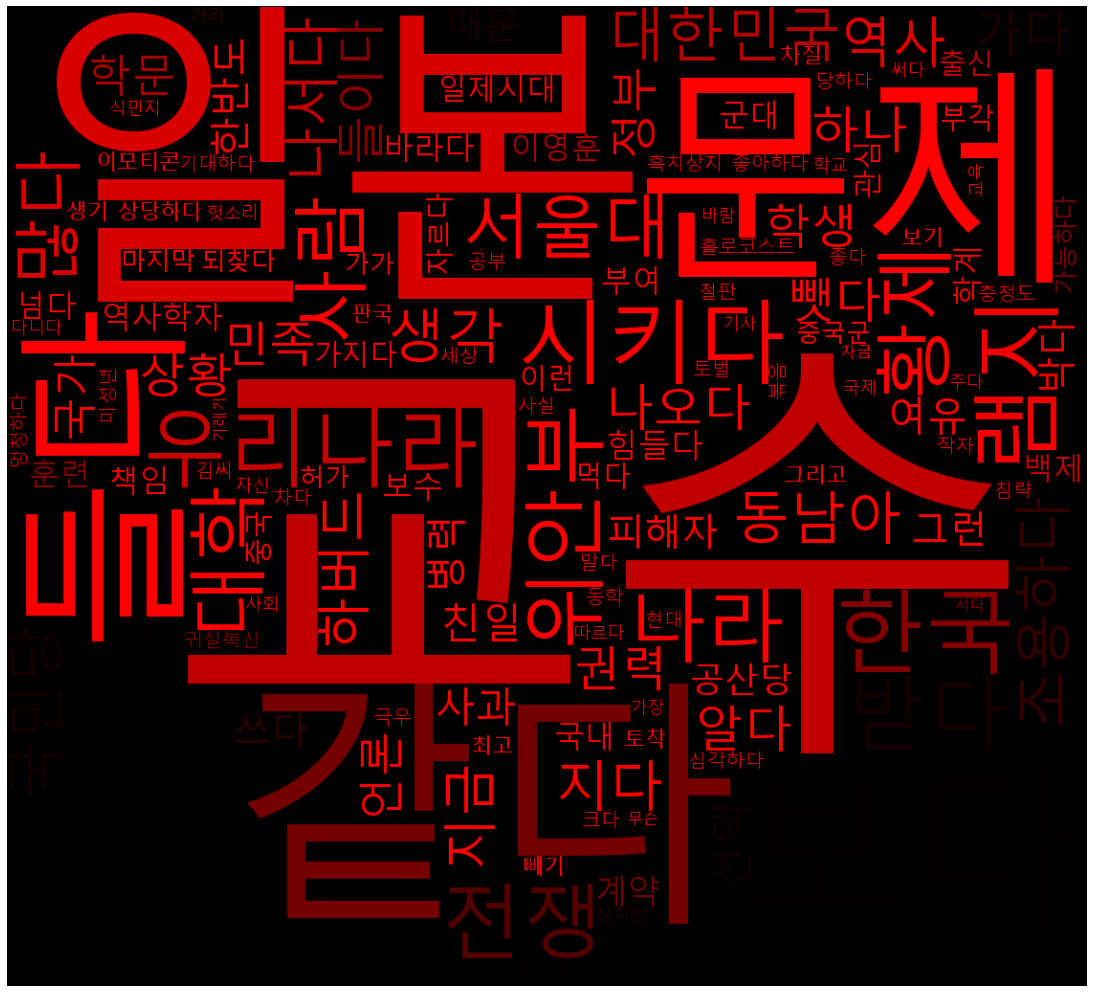

In [32]:
from wordcloud import ImageColorGenerator # Image로부터 Color를 생성(Generate)해내는 객체

coloring = np.array(Image.open("./heart.png"))
image_colors = ImageColorGenerator(coloring)

# WordCloud 객체를 생성
word_cloud = WordCloud(font_path="fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf" # 폰트 적용
                       width=1000, height=500,  
                       mask=coloring, 
                       background_color='black').generate_from_frequencies(word_dic)

plt.figure(figsize=(15,15)) # 화면에서 보여지는 워드클라우드 크기 변경
plt.imshow(word_cloud.recolor(color_func=image_colors), interpolation='bilinear') # 다시(re) 색칠하기
# plt.imshow(word_cloud.recolor(colormap='Blues'), interpolation='bilinear') # Matplotlib colormap 활용 (http://j.mp/32UXOQ6)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [33]:
word_cloud.to_file("daum_word_cloud_coloring.png")

In [ ]:
coloring = np.array(Image.open("./yellow-house.png"))
image_colors = ImageColorGenerator(coloring)

word_cloud = WordCloud(font_path="fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=2000, height=1000,  
                       mask=coloring, 
                       background_color='white').generate(doc)

plt.figure(figsize=(15,15)) # 이 부분을 수정하면 화면에서 보여지는 워드클라우드의 크기가 변경됨
plt.imshow(word_cloud) # image show
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()